In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed

# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# For example, here's several helpful packages to load



import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# Input data files are available in the read-only "../input/" directory

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



import os

for dirname, _, filenames in os.walk('/kaggle/input'):

    for filename in filenames:

        print(os.path.join(dirname, filename))



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 作業一

### 使用 TensorFlow 或 PyTorch 實作類神經網路模型預測股票價格（TensorFlow 使用 Dense layer；PyTorch 使用 Linear layer）。

In [28]:
!pip install yfinance

In [29]:
import yfinance as yf # yahoo finance 套件

import pandas as pd # 結構化資料處理套件

import datetime as dt # 時間套件

In [30]:
# 輸入股票代號

stock_id = "8299.TWO"

# stock_id = "2357.tw"

# stock_id = "AAPL"

# stock_id = "NVDA"



'''今天往前算幾天'''

# 資料結束時間

#end = dt.date.today()

# output : 2024-09-30

end = dt.date(2024, 10, 16)

# 抓取半年資料（現在-過去180天）

start = end - dt.timedelta(days=3000)



'''抓取特定時間'''

# start = dt.datetime(2024, 1, 1)  # 指定的開始日期

# end = dt.datetime(2024, 6, 30)    # 指定的結束日期





# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間

df = yf.download(stock_id, start=start, end=end).reset_index()



df

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,8299.TWO,8299.TWO,8299.TWO,8299.TWO,8299.TWO,8299.TWO
0,2016-08-01 00:00:00+00:00,184.011353,269.0,269.0,262.5,264.0,1120911
1,2016-08-02 00:00:00+00:00,183.669342,268.5,270.5,267.0,270.5,682653
2,2016-08-03 00:00:00+00:00,183.327286,268.0,268.0,264.5,266.0,520435
3,2016-08-04 00:00:00+00:00,184.353378,269.5,269.5,266.0,269.0,560652
4,2016-08-05 00:00:00+00:00,184.353378,269.5,274.0,267.0,268.5,2338308
...,...,...,...,...,...,...,...
1992,2024-10-08 00:00:00+00:00,489.000000,489.0,489.0,483.5,487.0,940000
1993,2024-10-09 00:00:00+00:00,491.500000,491.5,500.0,489.5,489.5,1340000
1994,2024-10-11 00:00:00+00:00,482.000000,482.0,486.5,480.0,486.5,1545000


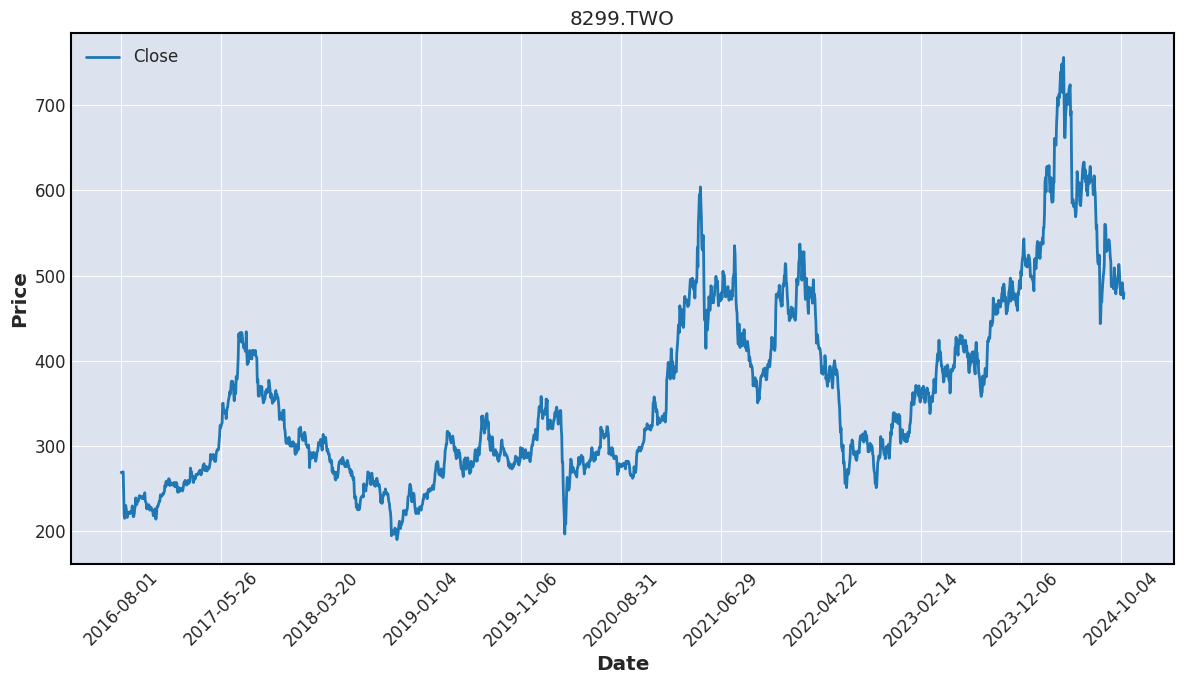

In [31]:
import matplotlib.pyplot as plt



# 畫布尺寸大小設定

plt.figure(figsize=(12, 7))



# 設定要繪製的資料欄位

plt.plot(df['Close'], label='Close')



# 設定 x 軸的時間

num = 10

date = df["Date"].dt.strftime('%Y-%m-%d')

plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num

           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num

           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性



# 設定圖表的標題，x 軸和 y 軸的標籤

plt.title(f'{stock_id}')   # 將股票代號設為圖標

plt.xlabel('Date')         # x 軸標籤

plt.ylabel('Price')  # y 軸標籤

plt.legend(loc='upper left') # 在左上角顯示圖例

plt.grid(True) # 在圖上顯示網格

plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊



# 顯示圖表

plt.show()

In [32]:
!pip install mplfinance

In [33]:
# 將原始的 dataframe 再建立一個出來

kplot_df = df.set_index('Date')



# 過濾掉非數字列

numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']

kplot_df = kplot_df[numeric_columns]



# 檢查並確保所有數據都是 float

kplot_df = kplot_df.astype(float)

kplot_df['2023-8-01':'2023-09-18'].tail()

Price,Open,High,Low,Close,Volume
Ticker,8299.TWO,8299.TWO,8299.TWO,8299.TWO,8299.TWO
Date,,,,,
2023-09-12 00:00:00+00:00,444.5,447.5,432.0,441.0,2714000.0
2023-09-13 00:00:00+00:00,443.5,446.0,434.0,443.5,1647000.0
2023-09-14 00:00:00+00:00,449.0,451.0,441.0,446.0,1702000.0
2023-09-15 00:00:00+00:00,450.0,484.5,449.5,473.5,9386000.0
2023-09-18 00:00:00+00:00,467.5,478.0,461.0,468.5,2949000.0


In [34]:
# kplot_df.fillna(0, inplace=True)  # 用 0 填補

In [35]:
kplot_df.columns

# 將 MultiIndex 轉換為單層索引

kplot_df.columns = kplot_df.columns.get_level_values(0)



# 檢查轉換後的欄位名稱

print(kplot_df.head())

Price                       Open   High    Low  Close     Volume
Date                                                            
2016-08-01 00:00:00+00:00  264.0  269.0  262.5  269.0  1120911.0
2016-08-02 00:00:00+00:00  270.5  270.5  267.0  268.5   682653.0
2016-08-03 00:00:00+00:00  266.0  268.0  264.5  268.0   520435.0
2016-08-04 00:00:00+00:00  269.0  269.5  266.0  269.5   560652.0
2016-08-05 00:00:00+00:00  268.5  274.0  267.0  269.5  2338308.0


/opt/conda/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


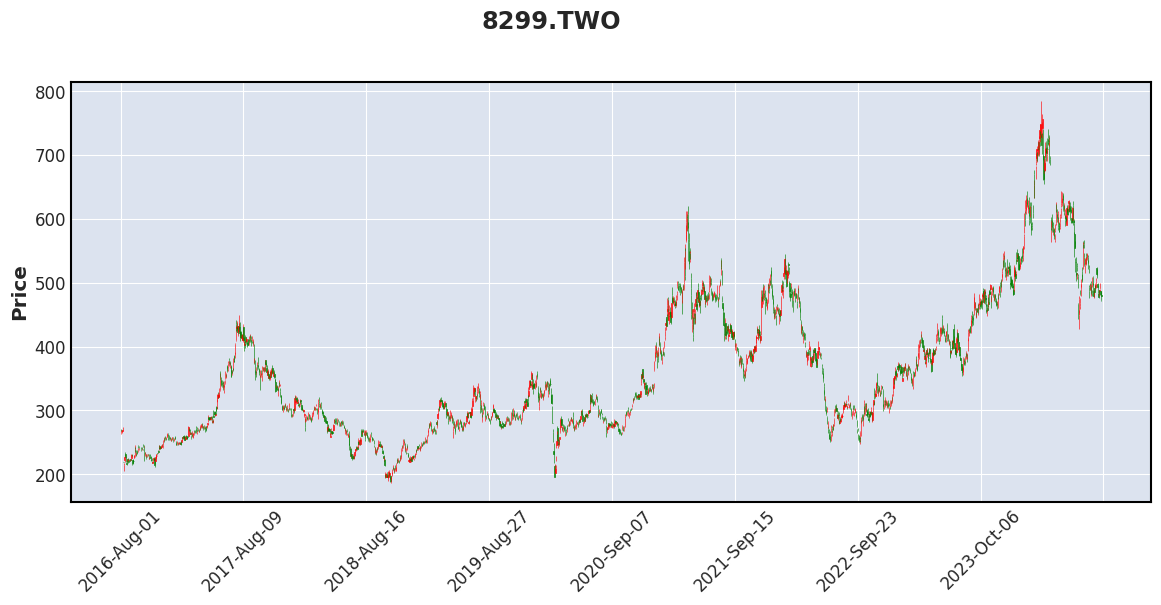

In [36]:
import mplfinance as mpf

# 設置繪圖風格

my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)

my_style = mpf.make_mpf_style(base_mpf_style='default',

                marketcolors=my_color)



# 使用 mplfinance 繪製 K 線圖

mpf.plot(kplot_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6))

# 分割訓練、測試資料

In [37]:
kplot_df

Price,Open,High,Low,Close,Volume
Date,,,,,
2016-08-01 00:00:00+00:00,264.0,269.0,262.5,269.0,1120911.0
2016-08-02 00:00:00+00:00,270.5,270.5,267.0,268.5,682653.0
2016-08-03 00:00:00+00:00,266.0,268.0,264.5,268.0,520435.0
2016-08-04 00:00:00+00:00,269.0,269.5,266.0,269.5,560652.0
2016-08-05 00:00:00+00:00,268.5,274.0,267.0,269.5,2338308.0
...,...,...,...,...,...
2024-10-08 00:00:00+00:00,487.0,489.0,483.5,489.0,940000.0
2024-10-09 00:00:00+00:00,489.5,500.0,489.5,491.5,1340000.0
2024-10-11 00:00:00+00:00,486.5,486.5,480.0,482.0,1545000.0


In [38]:
# 資料準備
kplot_df = kplot_df["Close"]
#設定窗口大小
window_size = 5

sequence_data = []

for i in range(len(kplot_df)-window_size+1):
    window = kplot_df.iloc[i:i+window_size]
    sequence_data.append(window.values)

sequence_data = np.array(sequence_data)
print(sequence_data.shape)



(1993, 5)


In [39]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
# 準備數據：前4天當輸入，第5天當預測目標
X = sequence_data[:, :-1]
y = sequence_data[:, -1].reshape(-1, 1)

# 初始化 scaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

# 對整個 X 和 y 進行標準化
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y).flatten()  # 轉成一維向量

# 切分成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=69)

# 檢查數據集形狀
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")

Training data shape: (1594, 4)
Test data shape: (399, 4)
Training target shape: (1594,)
Test target shape: (399,)


In [41]:
print(X.shape)
print(y.shape)

(1993, 4)
(1993, 1)


In [42]:
class StockDataset(Dataset):
    def __init__(self,X,y):
        self.X = torch.tensor(X,dtype=torch.float32)
        self.y = torch.tensor(y,dtype=torch.float32)
        
    def __len__(self):
        return len(self.y)

    def __getitem__(self,index):
        return self.X[index], self.y[index]
    

In [43]:
# 建立 DataLoader
train_dataset = StockDataset(X_train, y_train)
test_dataset = StockDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# 確認 DataLoader 的輸出
for X_batch, y_batch in train_loader:
    print(X_batch.shape)  # (batch_size, 4)
    print(y_batch.shape)  # (batch_size,)
    break

torch.Size([16, 4])
torch.Size([16])


In [44]:
import torch.nn as nn

## 用lstm 預測股價

In [109]:
# 定義lstm

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_size=1, dropout=0.2):
        super(LSTMModel, self).__init__()
        
        # gru 層
        self.lstm = nn.GRU(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        # Dropout 層
        self.dropout = nn.Dropout(dropout)
        # 全連接層
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # LSTM 層的輸出 (out) 和隱藏狀態 (hn, cn)
        out, _ = self.lstm(x)
        
        # 取最後一個時間步的輸出
        out = out[:, -1, :]
        
        # 通過 Dropout 層
        out = self.dropout(out)
        # 通過全連接層進行最終預測
        out = self.fc(out)
        
        return out

# 創建模型
model = LSTMModel(input_size=1, hidden_size=64, num_layers=2, output_size=1)


# 定義損失函數和優化器
# 設定訓練參數
epochs = 50
lr = 0.01

criterion = nn.L1Loss()  # 使用mae

optimizer = torch.optim.SGD(model.parameters(), lr=lr)  # 隨機梯度下降優化器



# 訓練模型
for epoch in range(epochs):
    model.train()  # 設定模型為訓練模式
    
    # 初始化累積損失
    epoch_loss = 0.0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()  # 清除梯度
        
        # 前向傳播
        X_batch = X_batch.view(X_batch.size(0), X_batch.size(1), 1)  # (batch_size, sequence_length, features)
        predictions = model(X_batch)  # 使用LSTM模型預測
        y_batch = y_batch.view(-1, 1)
        # 計算損失
        loss = criterion(predictions, y_batch)
        
        # 反向傳播
        loss.backward()
        
        # 更新權重
        optimizer.step()
        
        epoch_loss += loss.item()  # 累加損失
    
    # 每10個 epoch 輸出一次訓練狀態
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(train_loader):.4f}")

# 使用訓練好的模型預測測試資料
model.eval()  # 設定模型為評估模式
all_predictions = []  # 用來存儲所有預測結果

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.view(X_batch.size(0), X_batch.size(1), 1)  # 根據需要調整 X 的形狀
        batch_predictions = model(X_batch)  # 獲取當前批次的預測結果
        
        all_predictions.append(batch_predictions.detach().cpu().numpy())  # 把預測結果加到列表中

# 將所有預測結果合併成一個大陣列
all_predictions = np.concatenate(all_predictions, axis=0)

# 檢查合併後的預測結果形狀
print(f"Total number of predictions: {all_predictions.shape[0]}")


Epoch [10/50], Loss: 0.1039
Epoch [20/50], Loss: 0.0990
Epoch [30/50], Loss: 0.0934
Epoch [40/50], Loss: 0.0919
Epoch [50/50], Loss: 0.0912
Total number of predictions: 399


In [110]:
# 將預測結果反標準化回原始尺度
all_predictions = all_predictions.reshape(-1, 1)  # 這裡假設您有一個列向量
all_predictions = scaler_y.inverse_transform(all_predictions)

# 計算最後5筆的平均值
last_5_avg = np.mean(all_predictions[-5:])
print(last_5_avg)
# 使用最後5筆的平均值來填充4筆資料
additional_predictions = np.full((4,1), last_5_avg)
print("Test predictions with additional values:",additional_predictions )
# 合併原來的預測結果與填充的預測結果
all_predictions = np.concatenate([all_predictions, additional_predictions])

# 打印最終的預測結果
print("Test predictions with additional values:", all_predictions)

318.784
Test predictions with additional values: [[318.784]
 [318.784]
 [318.784]
 [318.784]]
Test predictions with additional values: [[262.10962]
 [222.15552]
 [512.0827 ]
 [246.19843]
 [448.72852]
 [498.6484 ]
 [197.0089 ]
 [288.84344]
 [485.02917]
 [270.87225]
 [612.1804 ]
 [499.19156]
 [624.327  ]
 [387.76016]
 [528.3135 ]
 [619.2897 ]
 [330.81317]
 [424.21964]
 [326.48718]
 [287.85406]
 [291.4645 ]
 [236.072  ]
 [362.80307]
 [240.99031]
 [248.30534]
 [254.21068]
 [535.2006 ]
 [698.1712 ]
 [471.5993 ]
 [356.98447]
 [248.35182]
 [691.36035]
 [302.50143]
 [285.7786 ]
 [316.95178]
 [278.50128]
 [245.03798]
 [262.87244]
 [411.54727]
 [409.95996]
 [350.25916]
 [313.90915]
 [263.58807]
 [218.274  ]
 [281.57416]
 [278.66965]
 [256.4313 ]
 [272.8109 ]
 [358.67862]
 [496.33032]
 [282.88254]
 [365.97177]
 [257.41544]
 [349.9408 ]
 [210.74493]
 [394.8604 ]
 [427.57193]
 [391.90747]
 [285.1641 ]
 [535.7203 ]
 [223.33157]
 [236.45268]
 [274.5632 ]
 [554.3946 ]
 [281.45624]
 [340.07654]
 [299.5

In [47]:
 kplot_df = kplot_df.reset_index()

In [48]:
kplot_df

,Date,Close
0,2016-08-01 00:00:00+00:00,269.0
1,2016-08-02 00:00:00+00:00,268.5
2,2016-08-03 00:00:00+00:00,268.0
3,2016-08-04 00:00:00+00:00,269.5
4,2016-08-05 00:00:00+00:00,269.5
...,...,...
1992,2024-10-08 00:00:00+00:00,489.0
1993,2024-10-09 00:00:00+00:00,491.5
1994,2024-10-11 00:00:00+00:00,482.0
1995,2024-10-14 00:00:00+00:00,473.0


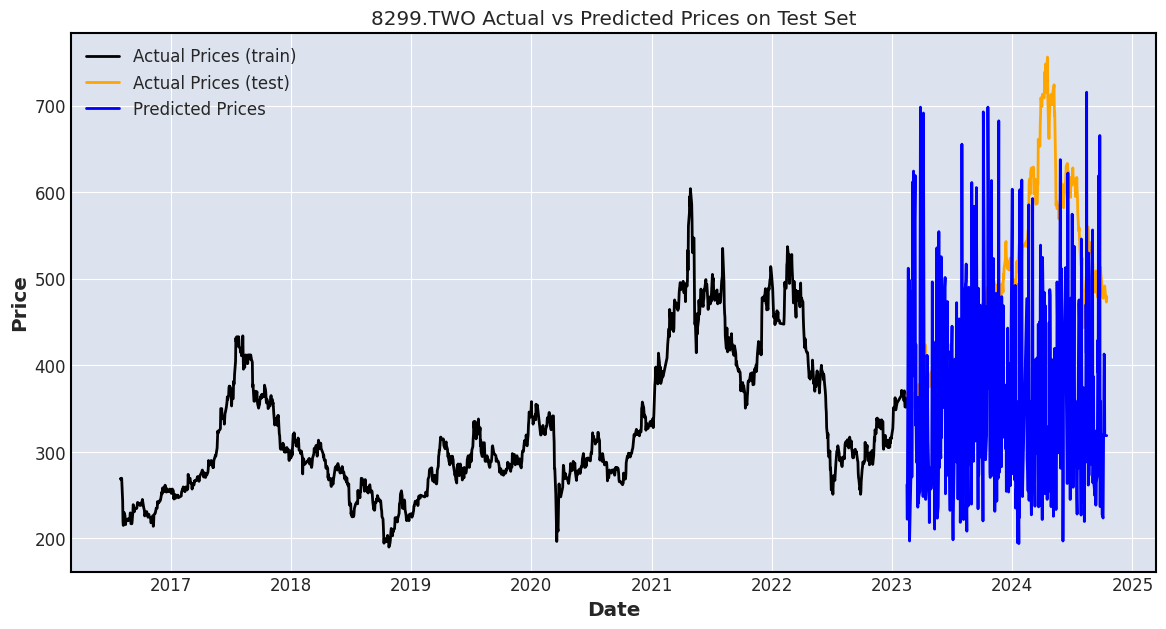

In [111]:
yhat = all_predictions  # 預測結果
yhats = yhat.flatten()

# 取出測試集日期，根據5天為一window選擇適當的索引
test_dates = kplot_df['Date'][len(X_train):]

# 畫圖
plt.figure(figsize=(14, 7))

# 訓練集實際價格走勢
plt.plot(kplot_df['Date'][:len(X_train)], kplot_df['Close'][:len(X_train)], label='Actual Prices (train)', color='black', linewidth=2)

# 測試集實際價格走勢
plt.plot(kplot_df['Date'][len(X_train):], kplot_df['Close'][len(X_train):], label='Actual Prices (test)', color='orange', linewidth=2)

# 測試集預測價格走勢，使用每5天的日期對應到每個window的預測值
plt.plot(test_dates, yhats, label='Predicted Prices', color='blue')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('8299.TWO Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()


# 作業二

### 使用 transformer 捕捉 K 線趨勢，並預測股價漲跌。

### 使用更多資料

In [50]:
len(test_loader)

25

In [51]:
# 建立 DataLoader
train_dataset = StockDataset(X_train, y_train)
test_dataset = StockDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# 確認 DataLoader 的輸出
for X_batch, y_batch in test_loader:
    print(X_batch.shape)  # (batch_size, 4)
    print(y_batch.shape)  # (batch_size,)
    
print(len(test_loader))

torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([16, 4])
torch.Size([16])
torch.Size([15, 4])
torch.Size([15])
25


In [118]:
# 定義 Transformer 模型
class TransformerModel(nn.Module):
    def __init__(self, input_size=1, d_model=64, num_layers=6, output_size=1):
        super(TransformerModel, self).__init__()
        
        self.d_model = d_model
        
        # 嵌入層：將輸入映射到 d_model 維度
        self.embedding = nn.Linear(input_size, d_model)
        
        # Transformer 層
        self.transformer = nn.Transformer(d_model=d_model, nhead=4, num_encoder_layers=num_layers, num_decoder_layers=num_layers, batch_first=True)
        
        # 輸出層
        self.fc = nn.Linear(d_model, output_size)

    def forward(self, x):
        # 嵌入層：將輸入映射到 d_model
        x = self.embedding(x)
        # Transformer 編碼器和解碼器的輸出
        # 調整形狀為 (sequence_length, batch_size, d_model)，以符合 Transformer 要求
        x = x.permute(1, 0, 2)
        transformer_out = self.transformer(x, x)  # x 作為 source 和 target
        # 取最後一個時間步的輸出
        out = transformer_out[-1, :, :]
        
        # 通過全連接層進行最終預測
        out = self.fc(out)
        
        return out

# 創建模型
model = TransformerModel(input_size=1, d_model=64, num_layers=6, output_size=1)

# 定義損失函數和優化器
criterion =  nn.MSELoss()  # 使用mae
optimizer = torch.optim.AdamW(model.parameters(), lr=0.02)

# 訓練模型
epochs = 500
# 訓練過程
best_loss = float('inf')  # 初始化最佳損失為無窮大
patience = 15  # 設定容忍次數（如果損失在這幾個epoch內未改善，就停止訓練）
epochs_no_improve = 0  # 記錄在沒有改善的情況下經過的epoch數量

for epoch in range(epochs):
    model.train()  # 設定模型為訓練模式
    
    epoch_loss = 0.0  # 本輪epoch的總損失初始化為0
    for X_batch, y_batch in train_loader:  # 遍歷訓練資料集
        optimizer.zero_grad()  # 清除梯度
        
        # 前向傳播
        X_batch = X_batch.view(X_batch.size(0), X_batch.size(1), 1)  # 調整輸入張量形狀 (batch_size, sequence_length, features)
        predictions = model(X_batch)  # 使用 Transformer 模型預測
        
        # 確保目標 y_batch 的形狀與預測相同
        y_batch = y_batch.view(-1, 1)  # 調整目標的形狀
        
        # 計算損失
        loss = criterion(predictions, y_batch)  # 計算預測與真實值的損失
        
        # 反向傳播
        loss.backward()
        
        # 更新權重
        optimizer.step()
        
        epoch_loss += loss.item()  # 累加本輪的損失值
    
    # 檢查是否需要早停
    if epoch_loss < best_loss:  # 如果當前epoch的損失比最佳損失還小
        best_loss = epoch_loss  # 更新最佳損失
        epochs_no_improve = 0  # 重置沒有改善的epoch計數
    else:
        epochs_no_improve += 1  # 如果沒有改善，則增加計數
    
    # 每10個epoch輸出一次損失
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(train_loader):.4f}")

    # 如果損失在一定的epoch內沒有改善，則停止訓練
    if epochs_no_improve >= patience:  # 如果沒有改善的epoch次數達到容忍次數
        print(f"Early stopping at epoch {epoch+1}")
        break  # 退出訓練

Epoch [10/500], Loss: 0.9983
Epoch [20/500], Loss: 0.9938
Early stopping at epoch 20


In [119]:
# 使用訓練好的模型進行預測
model.eval()  # 設定模型為評估模式
all_predictions = []

with torch.no_grad():
    for X_batch, _ in test_loader:
        X_batch = X_batch.view(X_batch.size(0), X_batch.size(1), 1)  # 根據需要調整 X 的形狀
        print(X_batch.shape)
        batch_predictions = model(X_batch)
        all_predictions.append(batch_predictions.detach().cpu().numpy())

# 將所有預測結果合併成一個大陣列
all_predictions = np.concatenate(all_predictions, axis=0)
# 檢查合併後的預測結果形狀
print(f"Total number of predictions: {all_predictions.shape[0]}")

torch.Size([16, 4, 1])
torch.Size([16, 4, 1])
torch.Size([16, 4, 1])
torch.Size([16, 4, 1])
torch.Size([16, 4, 1])
torch.Size([16, 4, 1])
torch.Size([16, 4, 1])
torch.Size([16, 4, 1])
torch.Size([16, 4, 1])
torch.Size([16, 4, 1])
torch.Size([16, 4, 1])
torch.Size([16, 4, 1])
torch.Size([16, 4, 1])
torch.Size([16, 4, 1])
torch.Size([16, 4, 1])
torch.Size([16, 4, 1])
torch.Size([16, 4, 1])
torch.Size([16, 4, 1])
torch.Size([16, 4, 1])
torch.Size([16, 4, 1])
torch.Size([16, 4, 1])
torch.Size([16, 4, 1])
torch.Size([16, 4, 1])
torch.Size([16, 4, 1])
torch.Size([15, 4, 1])
Total number of predictions: 399


In [120]:
# 檢查預測結果
print(f"Predictions: {all_predictions}")

Predictions: [[0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.03316335]
 [0.033

In [121]:
# 將預測結果反標準化回原始尺度
all_predictions = all_predictions.reshape(-1, 1)  # 這裡假設您有一個列向量
all_predictions = scaler_y.inverse_transform(all_predictions)

# 計算最後5筆的平均值
last_5_avg = np.mean(all_predictions[-5:])
print(last_5_avg)
# 使用最後5筆的平均值來填充4筆資料
additional_predictions = np.full((4,1), last_5_avg)
print("Test predictions with additional values:",additional_predictions )
# 合併原來的預測結果與填充的預測結果
all_predictions = np.concatenate([all_predictions, additional_predictions])

# 打印最終的預測結果
print("Test predictions with additional values:", all_predictions)

362.5704
Test predictions with additional values: [[362.5704]
 [362.5704]
 [362.5704]
 [362.5704]]
Test predictions with additional values: [[362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.5704]
 [362.57

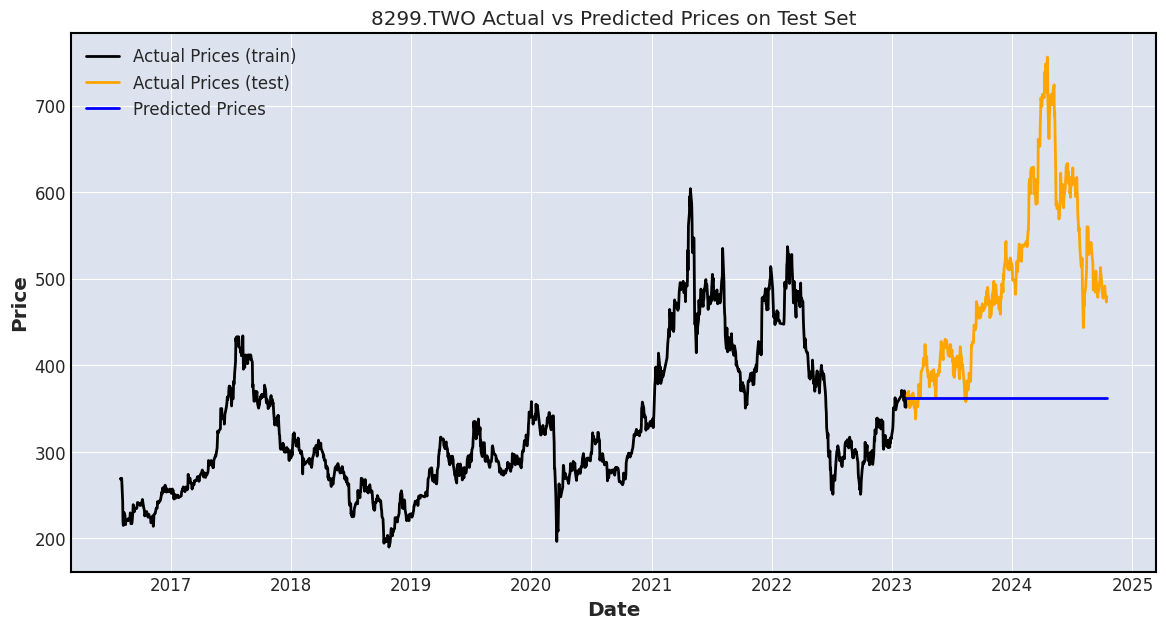

In [122]:
yhat = all_predictions  # 預測結果
yhats = yhat.flatten()

# 取出測試集日期，根據5天為一window選擇適當的索引
test_dates = kplot_df['Date'][len(X_train):]

# 畫圖
plt.figure(figsize=(14, 7))

# 訓練集實際價格走勢
plt.plot(kplot_df['Date'][:len(X_train)], kplot_df['Close'][:len(X_train)], label='Actual Prices (train)', color='black', linewidth=2)

# 測試集實際價格走勢
plt.plot(kplot_df['Date'][len(X_train):], kplot_df['Close'][len(X_train):], label='Actual Prices (test)', color='orange', linewidth=2)

# 測試集預測價格走勢，使用每5天的日期對應到每個window的預測值
plt.plot(test_dates, yhats, label='Predicted Prices', color='blue')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('8299.TWO Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()
